In [1]:
import re
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
columns = [u'cm_key', u'mvar2', u'mvar3', u'mvar4', u'mvar5', u'mvar6', u'mvar7', u'mvar8', u'mvar9', u'mvar10',
           u'mvar11', u'mvar12', u'mvar13', u'mvar14', u'mvar15', u'mvar16', u'mvar17', u'mvar18', u'mvar19', u'mvar20',
           u'mvar21', u'mvar22', u'mvar23', u'mvar24', u'mvar25', u'mvar26', u'mvar27', u'mvar28', u'mvar29', u'mvar30',
           u'mvar31', u'mvar32', u'mvar33', u'mvar34', u'mvar35', u'mvar36', u'mvar37', u'mvar38', u'mvar39', u'mvar40',
           u'mvar41', u'mvar42', u'mvar43', u'mvar44', u'mvar45', u'income_by_spending', u'membership_by_n',
           u'avg_electronics', u'avg_travel', u'avg_household', u'avg_car', u'avg_retailer', u'months_by_card',
           u'avg_quater1', u'avg_quater2', u'avg_quater3', u'avg_quater4', 
           u'avg_total', u'avg_sectors_quaters',
           u'other_spend_quater1_by_total', u'other_spend_quater2_by_total', u'other_spend_quater3_by_total',
           u'other_spend_quater4_by_total', u'other_spend_by_total', u'membership_by_income',u'spending_by_income',
           u'income_by_family', u'spending_by_family', u'membership_by_family'

]
quantity_features = [
                    u'mvar3', u'mvar6', u'mvar9', u'mvar16', u'mvar17', u'mvar18', u'mvar19', u'mvar20',
                    u'mvar21', u'mvar22', u'mvar23', u'mvar24', u'mvar25', u'mvar26', u'mvar27', u'mvar28', u'mvar29', 
                    u'mvar30', u'mvar31', u'mvar32', u'mvar33', u'mvar34', u'mvar35', u'mvar36', u'mvar37', u'mvar38', 
                    u'mvar39', u'avg_electronics', u'avg_travel', u'avg_household', u'avg_car', u'avg_retailer',
                    u'avg_quater1', u'avg_quater2', u'avg_quater3', u'avg_quater4', u'avg_total', u'avg_sectors_quaters',
                    u'income_by_family', u'spending_by_family', u'membership_by_family'
]
ratio_features = [
                u'mvar7', u'mvar8', u'mvar11',
                u'other_spend_quater1_by_total', u'other_spend_quater2_by_total', u'other_spend_quater3_by_total',
                u'other_spend_quater4_by_total', u'other_spend_by_total', u'months_by_card', 
                # u'accepted_by_extended_supp', u'accepted_by_extended_elite', u'accepted_by_extended_credit', 
                u'income_by_spending', u'membership_by_n',u'membership_by_income',u'spending_by_income'
]
number_features = [
                 u'mvar13', u'mvar14', u'mvar15', u'mvar2', u'mvar4', u'mvar5', u'mvar40',
                 u'mvar41', u'mvar42', u'mvar43', u'mvar44', u'mvar45'
]

categorical_columns = [u'mvar12', u'mvar10']
labels = pd.Series(train.target.values)
train = train[columns]
test = test[columns]

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_columns:
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.fit_transform(test[feature])
ltr = len(train)
test_key = test.cm_key
data = pd.concat([train, test], axis = 0)
data.drop(['cm_key'], axis = 1, inplace = True)
del train
del test

# Perform one operation out of two - Either convert them to normal values or take their log

# Transform the skewed numeric features by taking log(feature + 1).
# from scipy.stats import skew
# skewed = data[quantity_features].apply(lambda x: skew(x.dropna().astype(float)))
# skewed = skewed[skewed > 0.75]
# skewed = skewed.index
# data[skewed] = np.log1p(data[skewed])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[quantity_features])
scaled = scaler.transform(data[quantity_features])
for i, col in enumerate(quantity_features):
    data[col] = scaled[:,i]

train_data_df = data[:ltr]
test_data_df = data[ltr:]

del data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/innovationchef/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


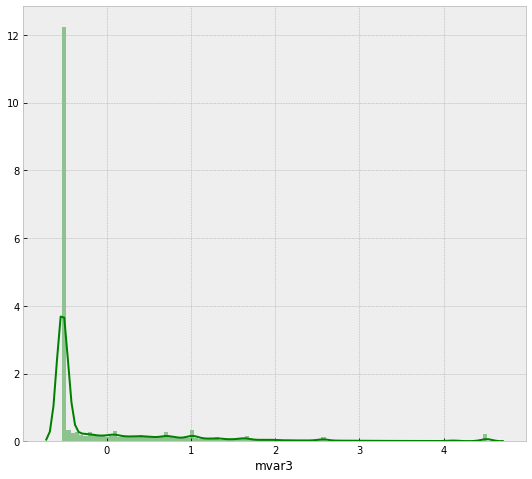

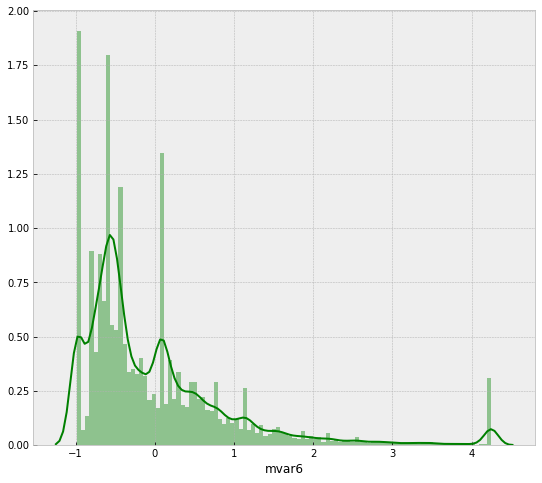

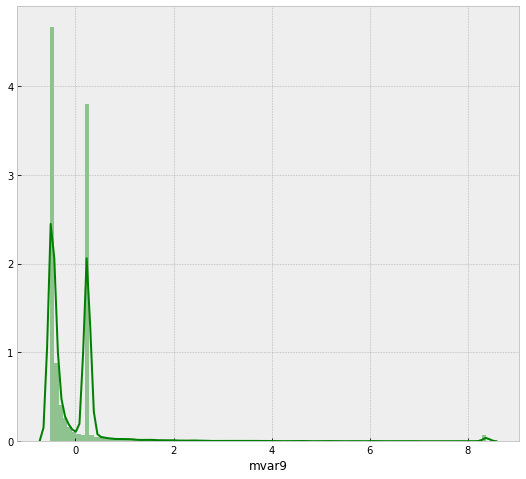

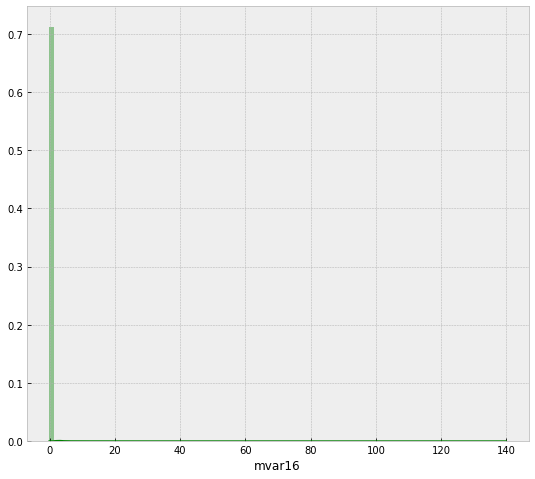

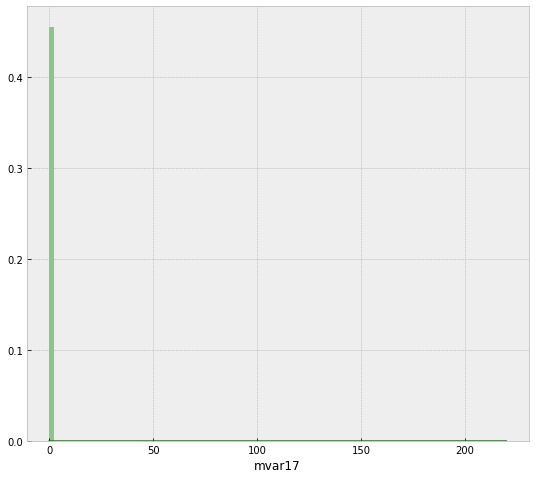

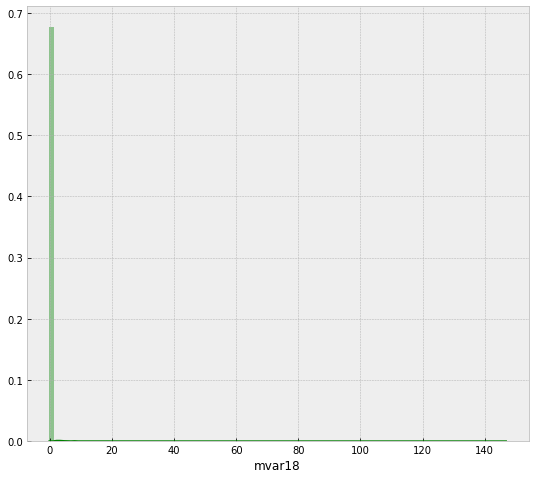

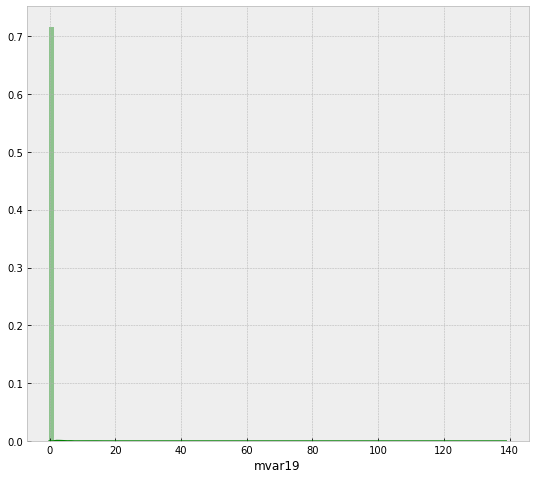

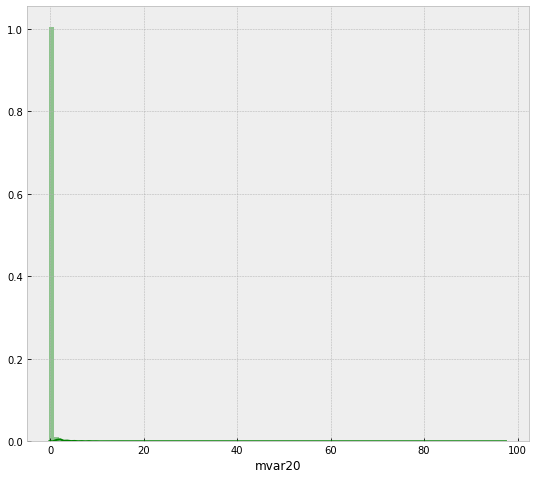

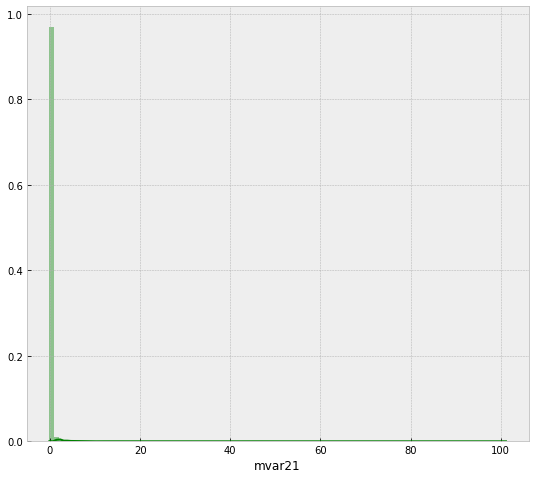

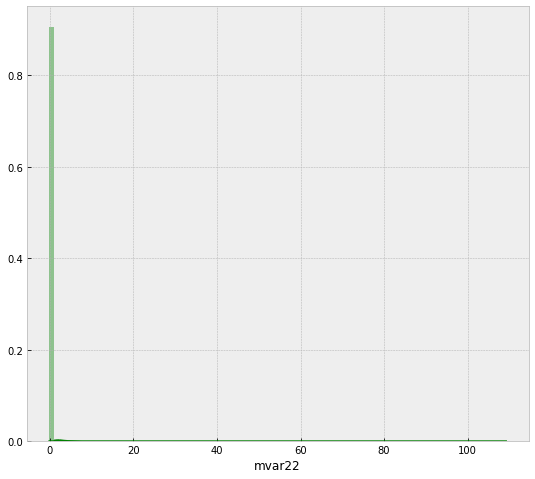

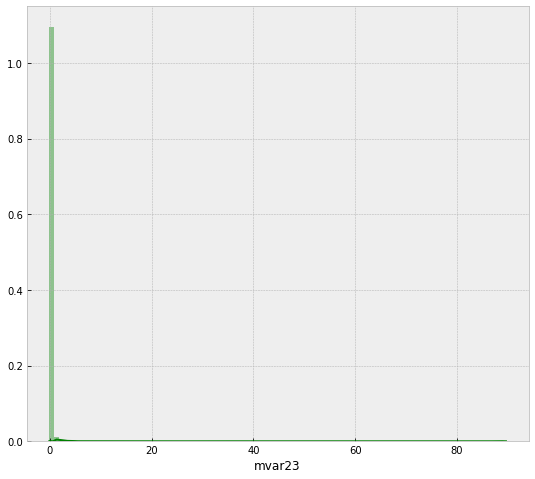

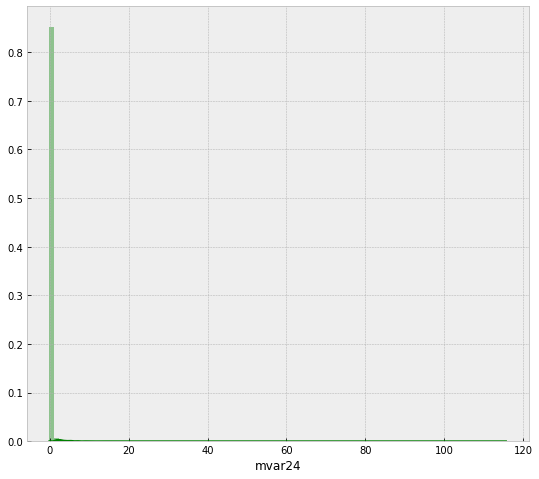

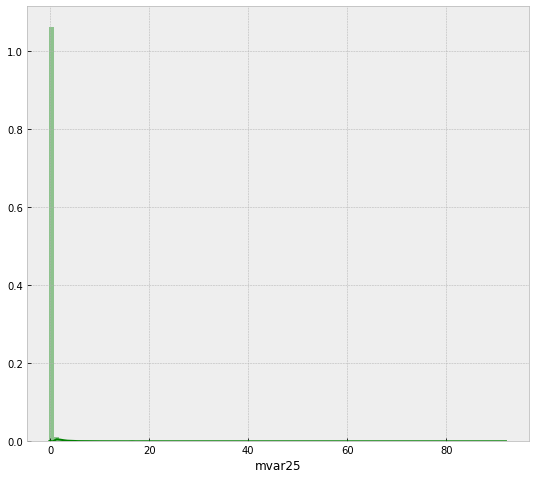

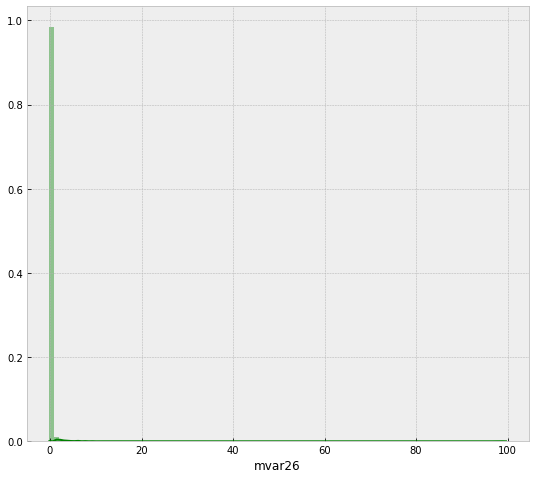

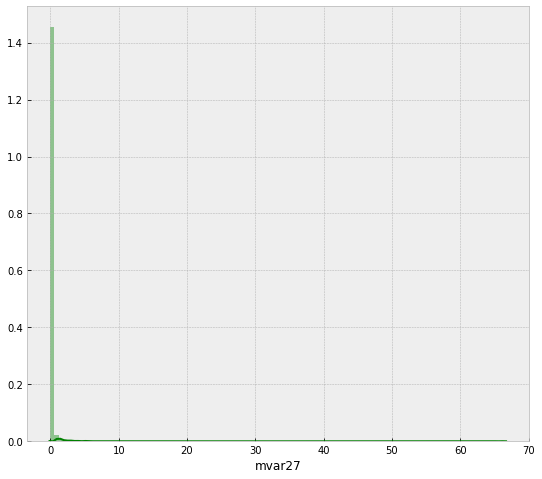

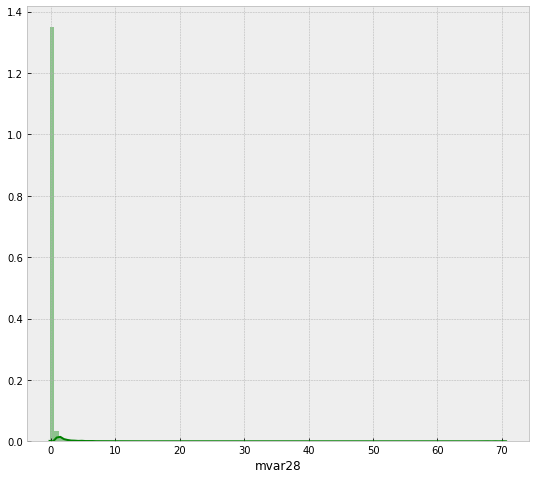

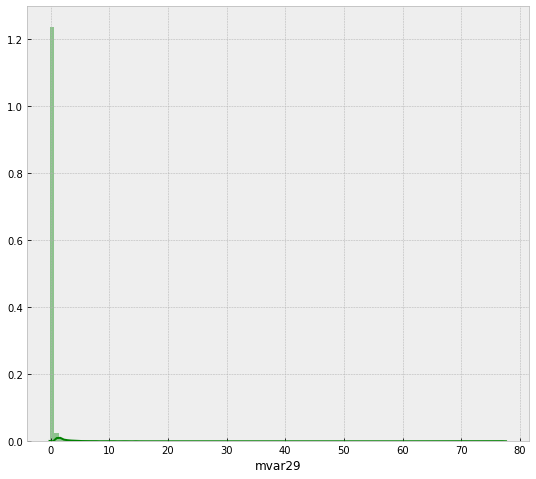

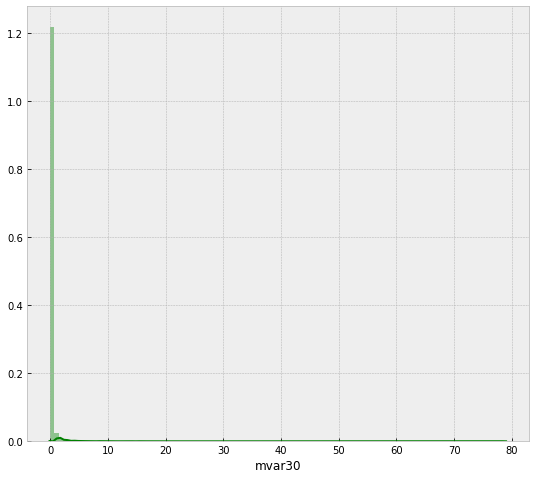

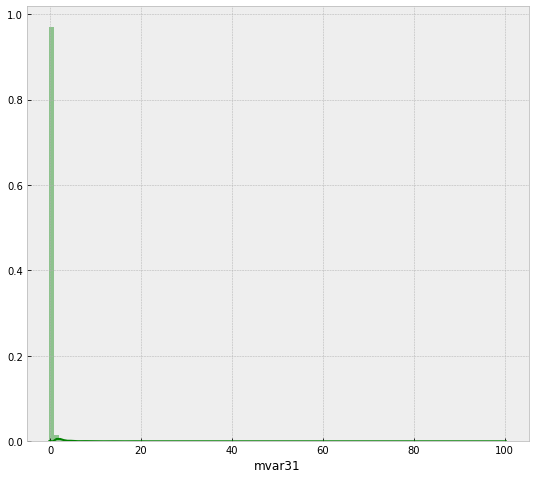

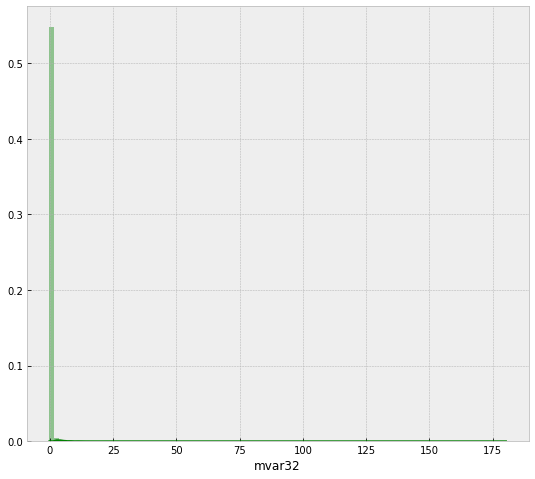

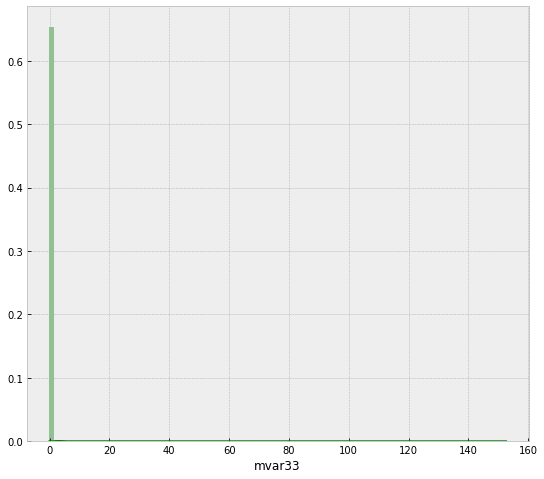

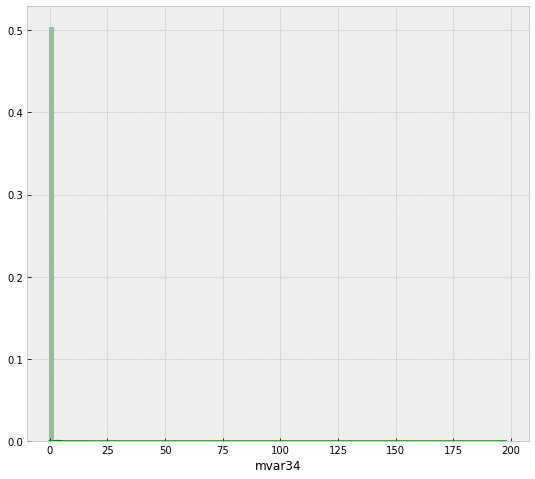

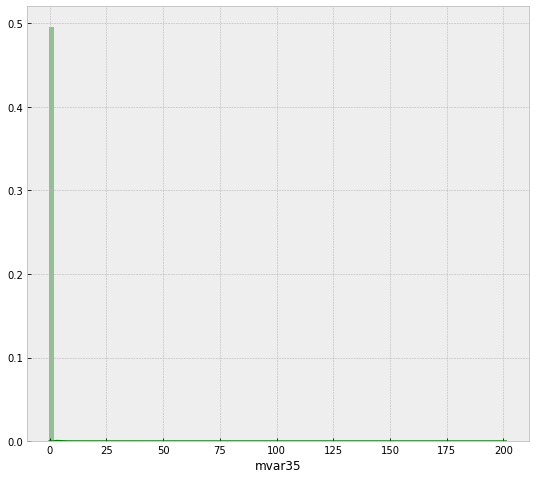

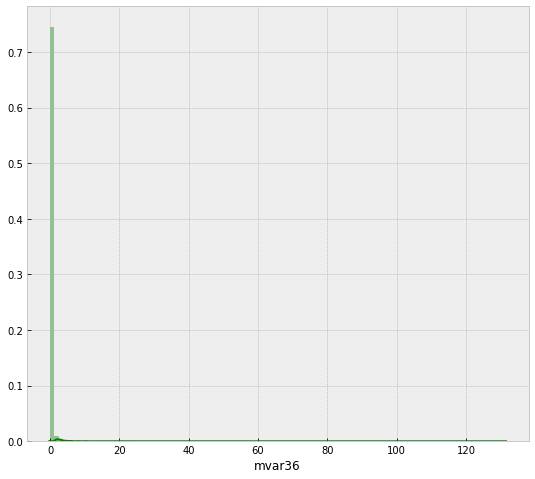

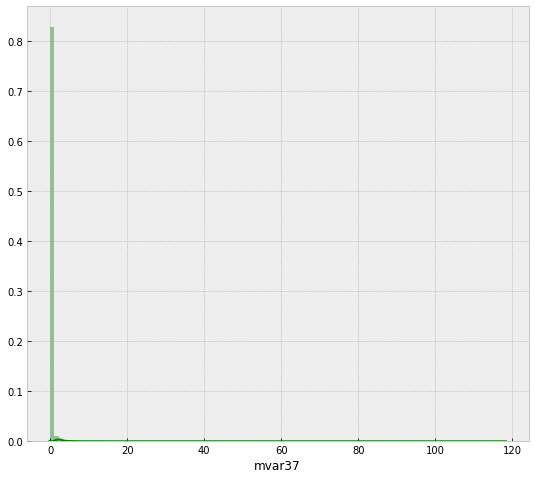

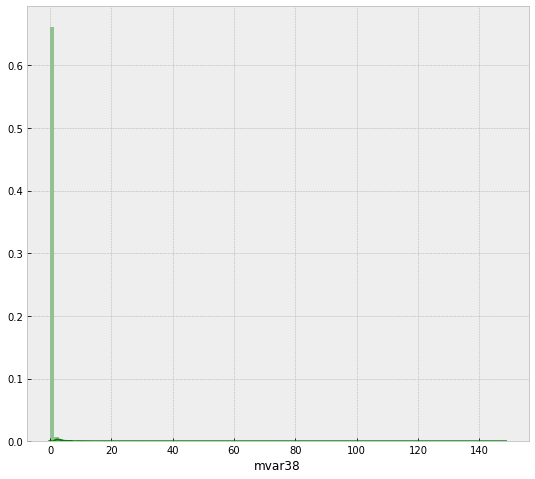

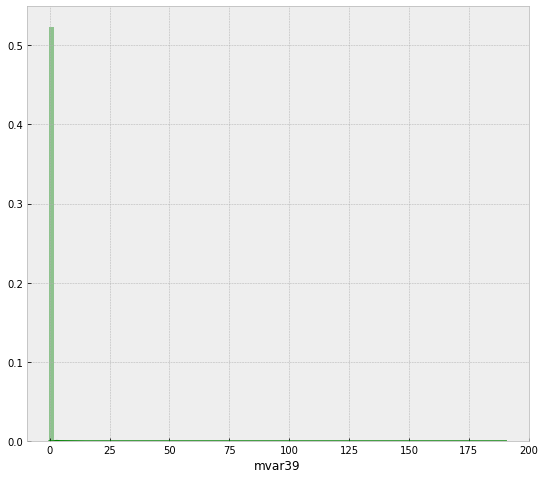

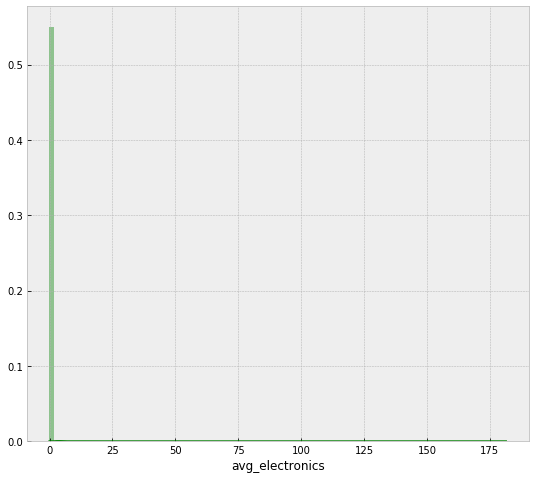

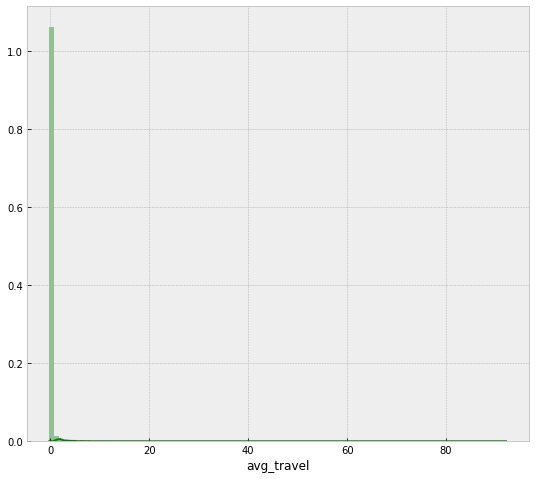

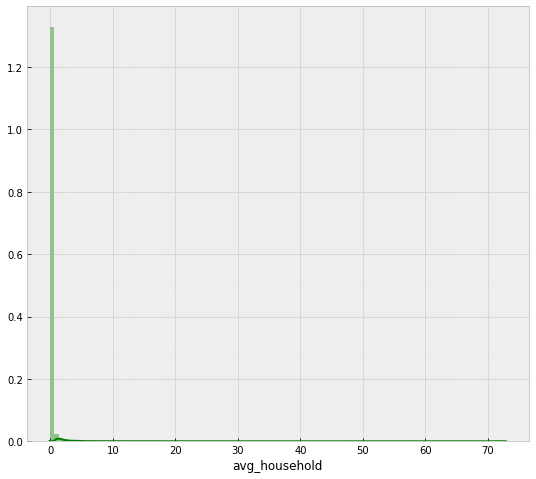

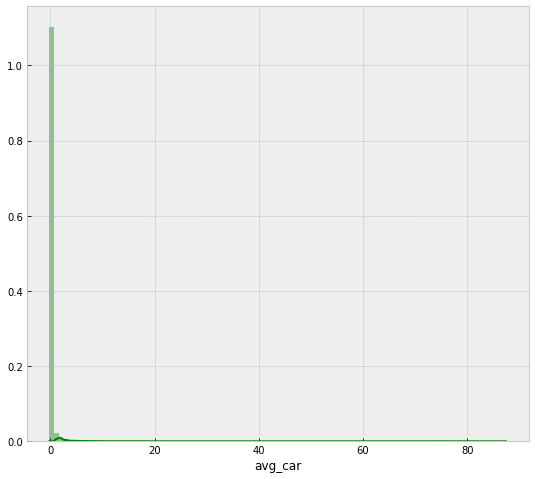

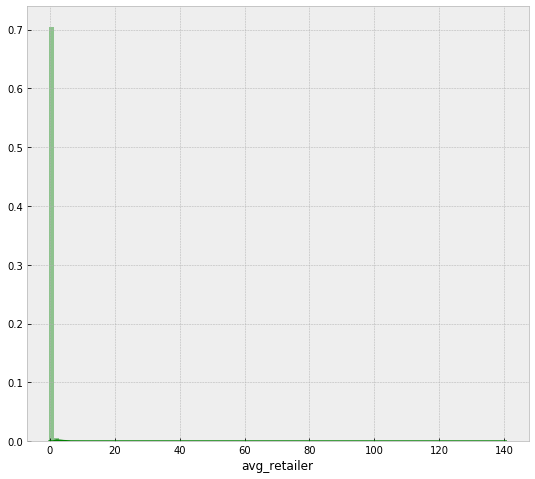

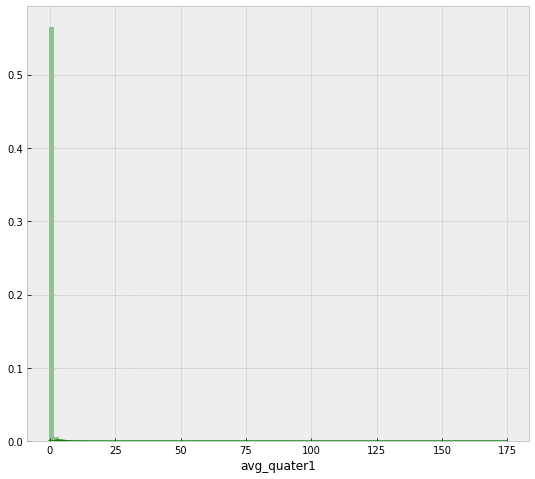

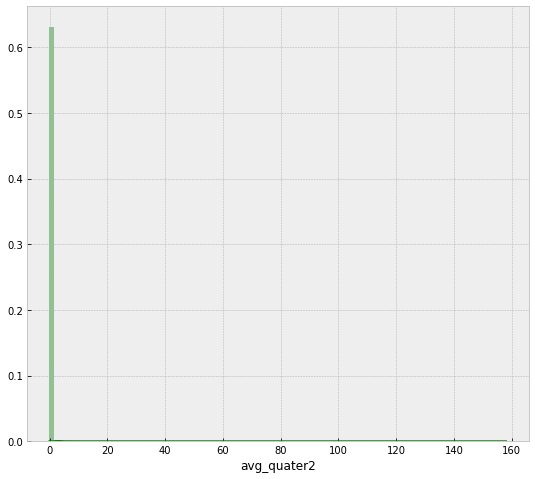

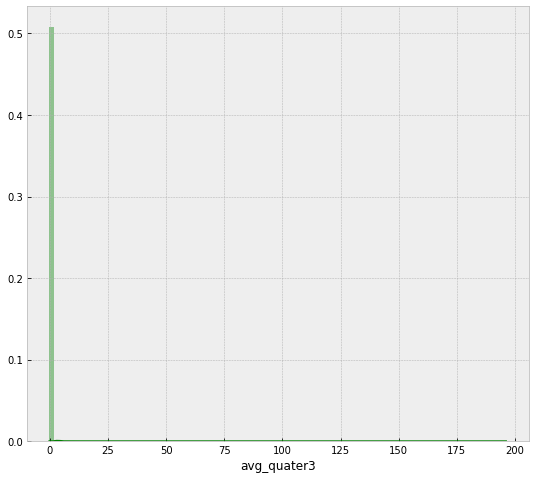

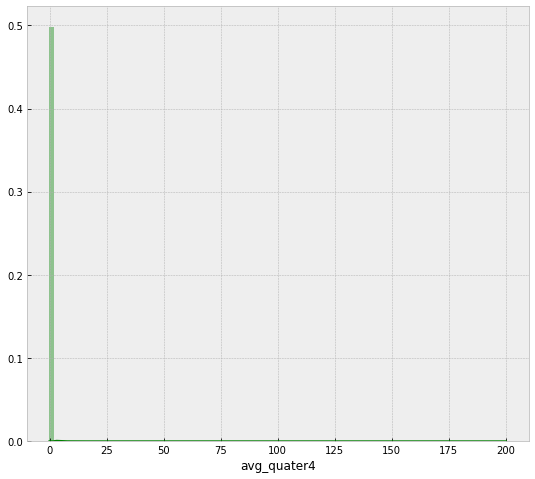

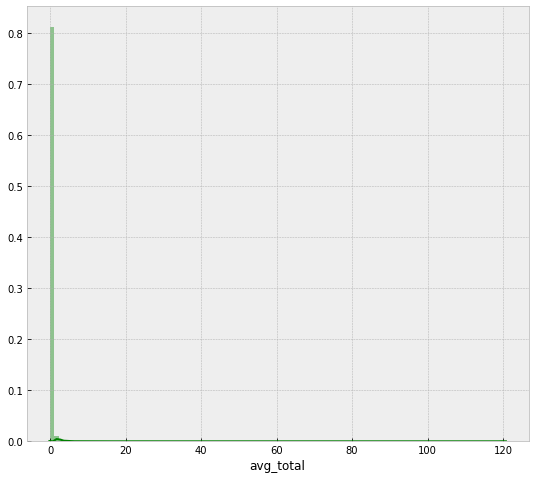

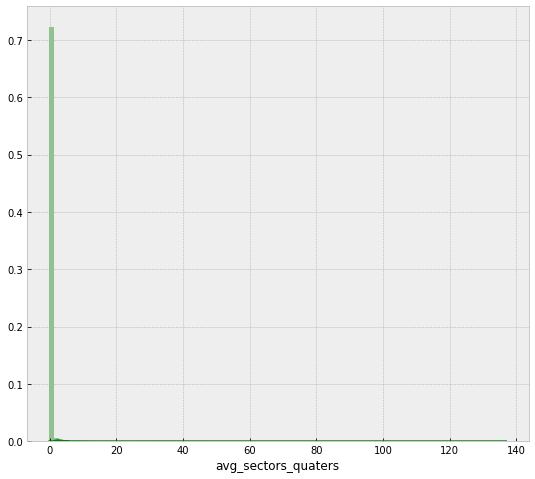

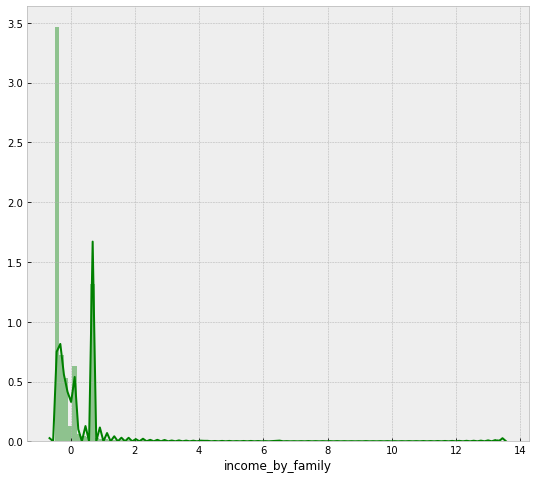

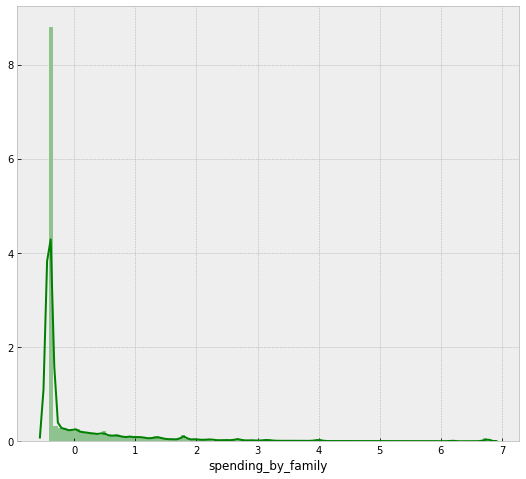

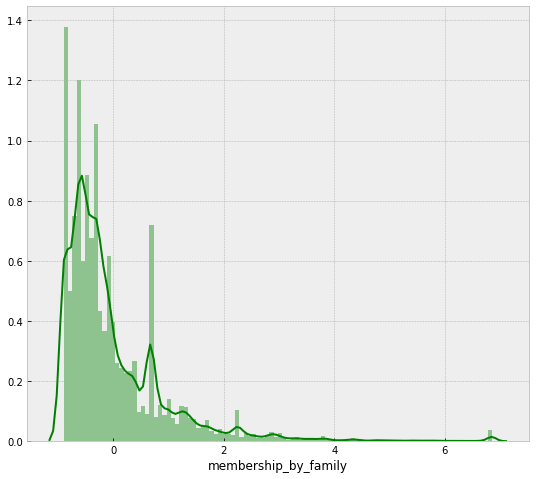

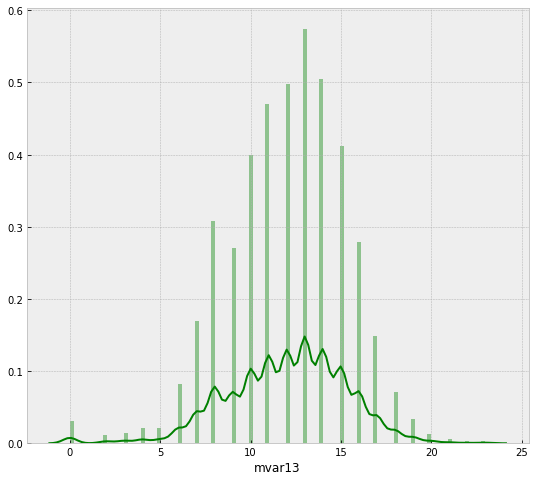

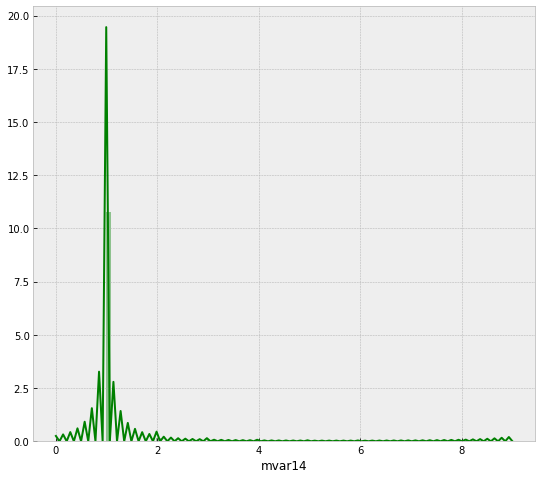

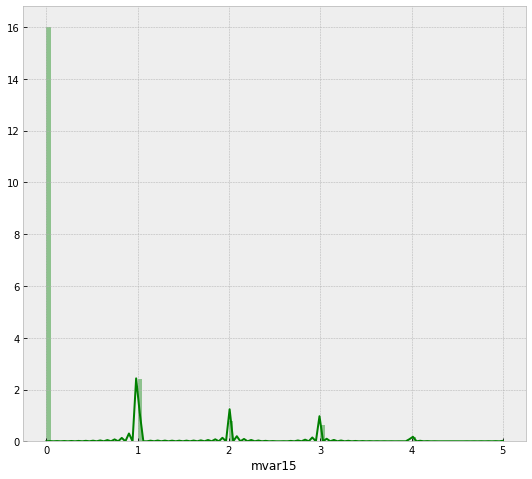

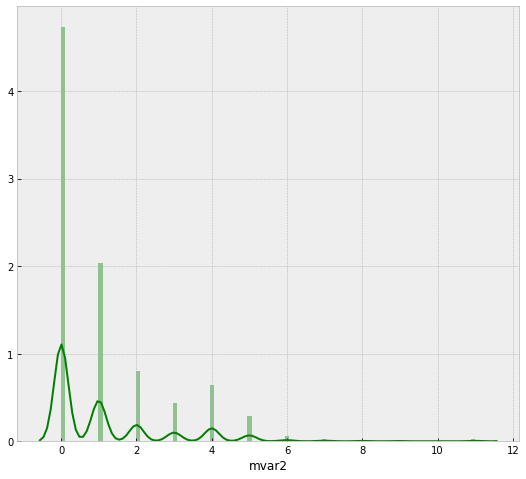

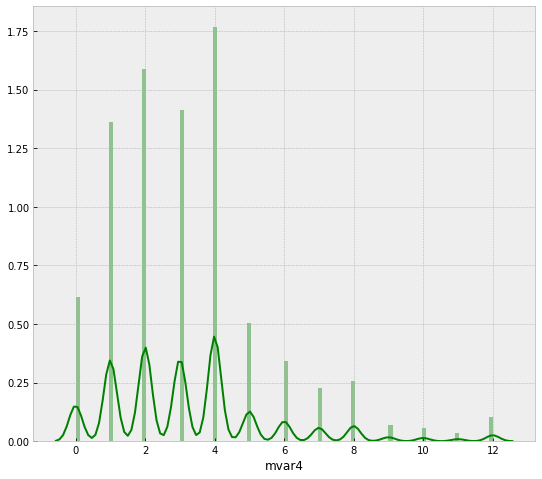

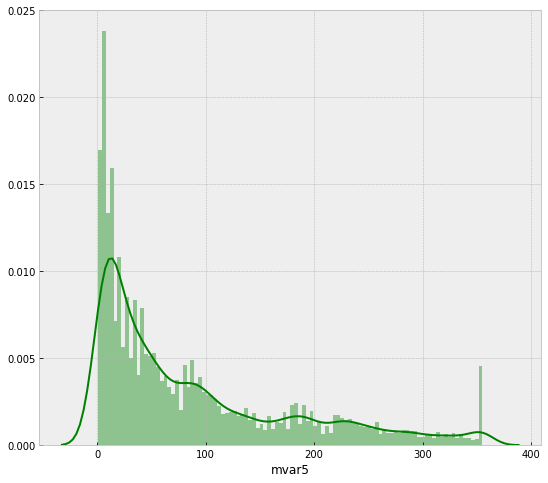

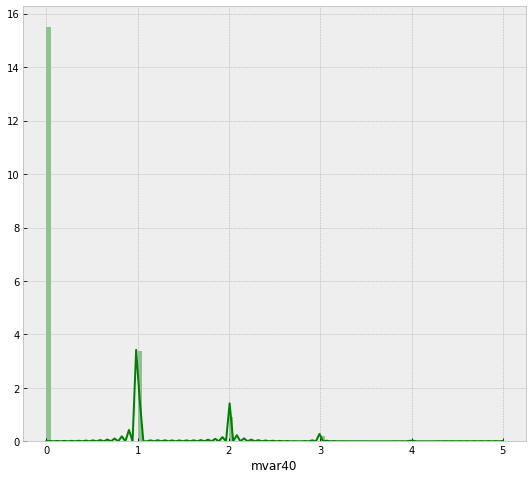

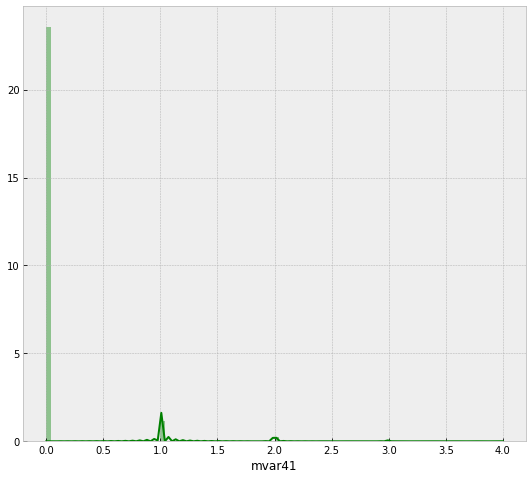

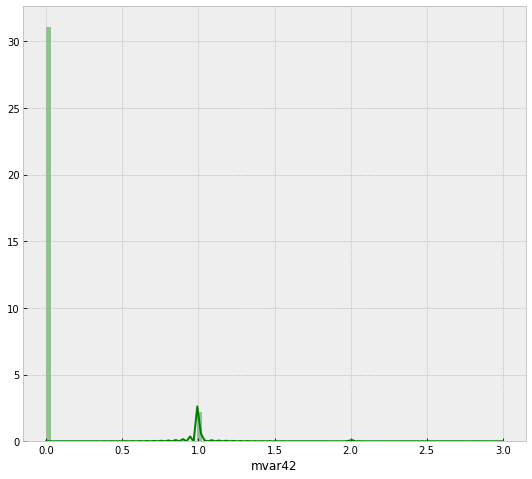

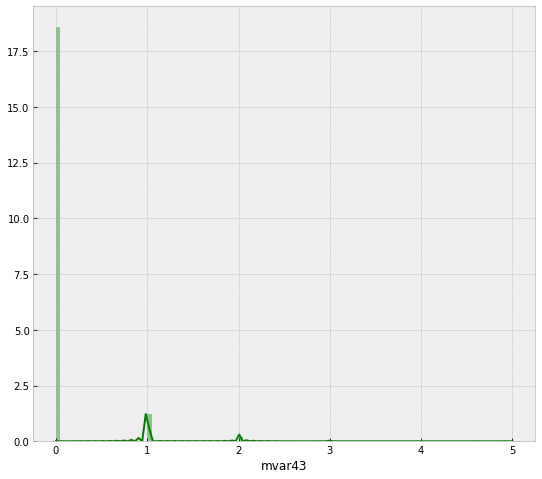

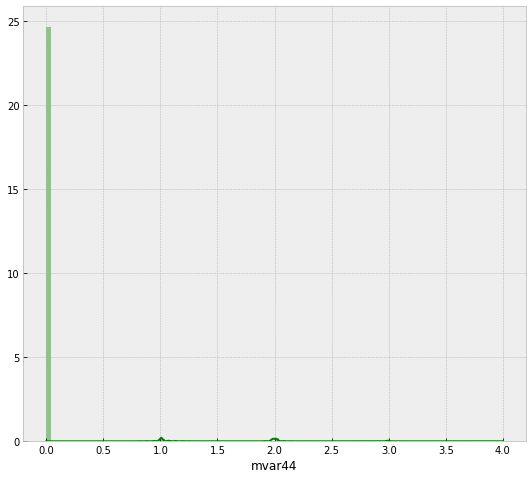

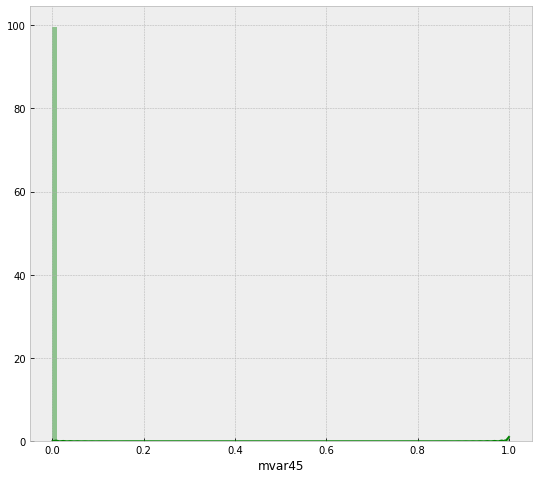

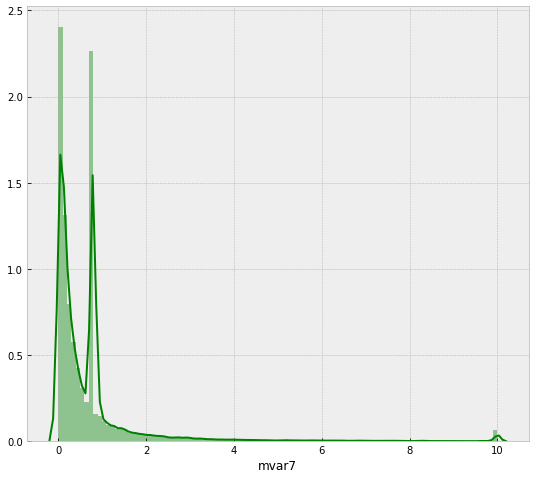

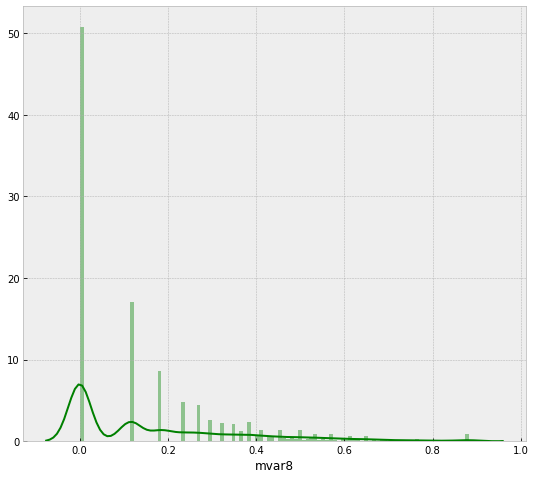

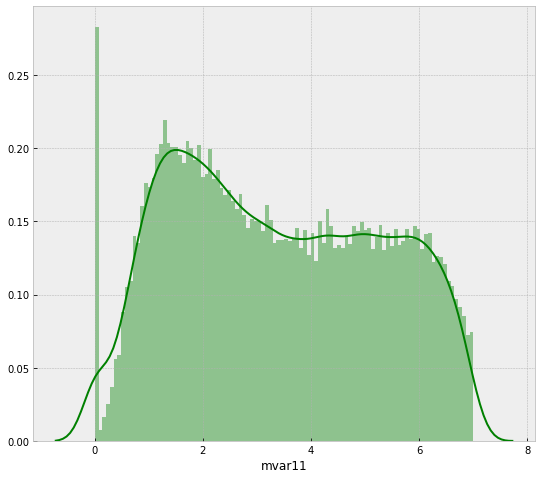

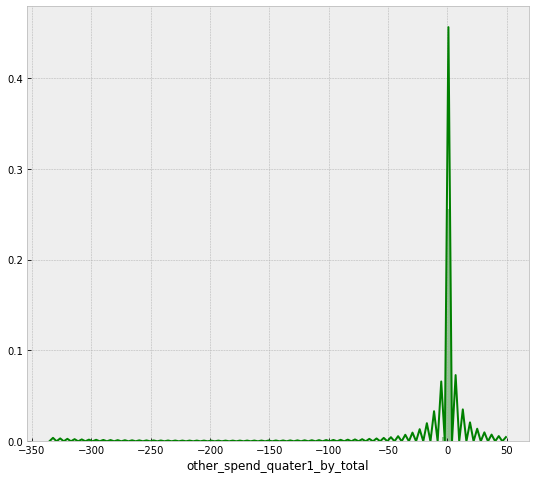

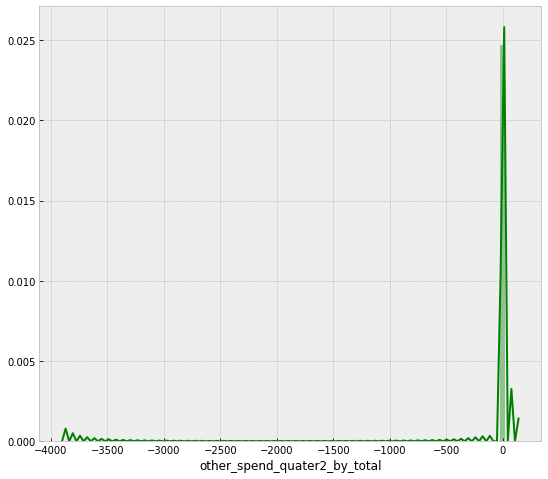

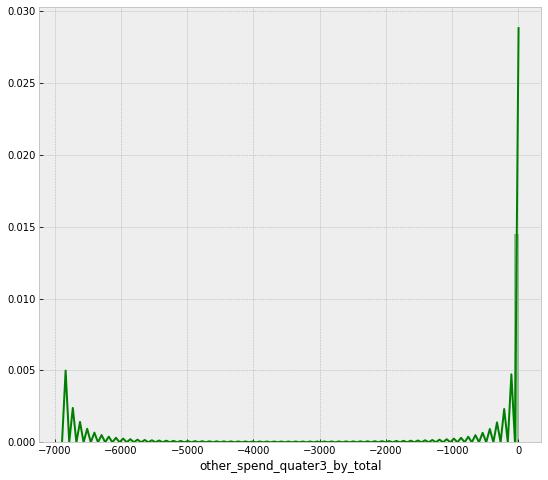

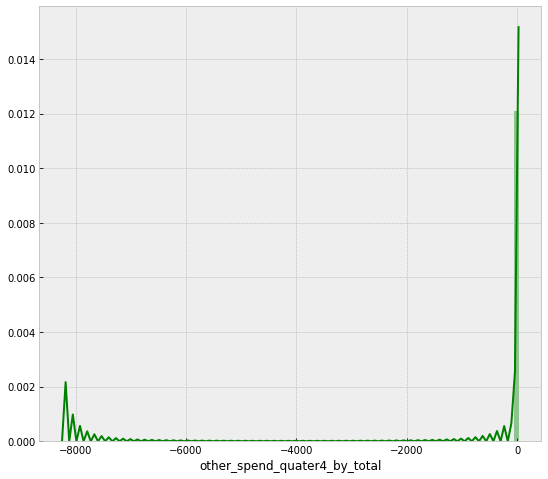

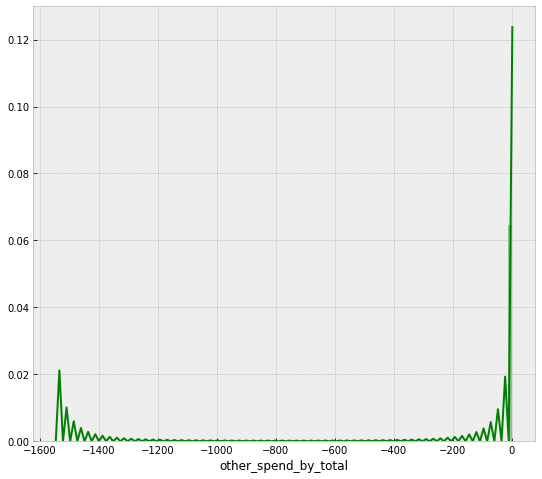

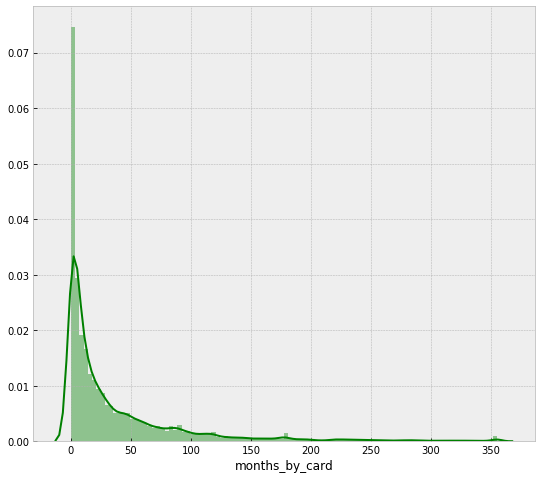

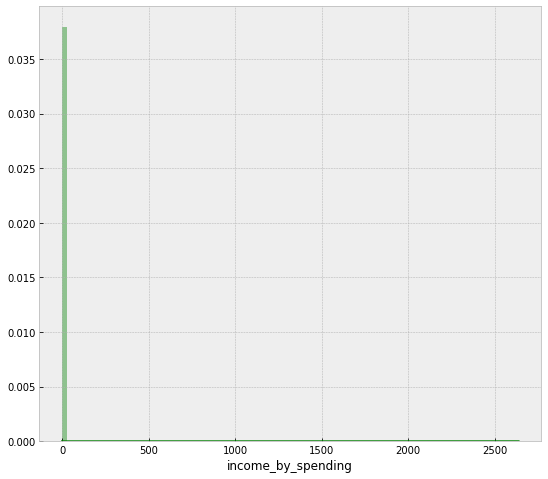

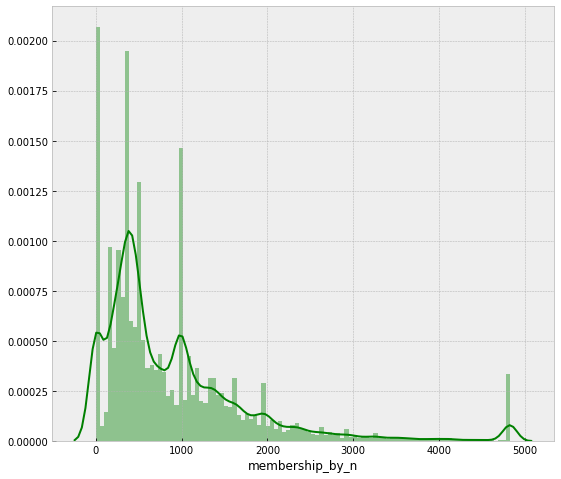

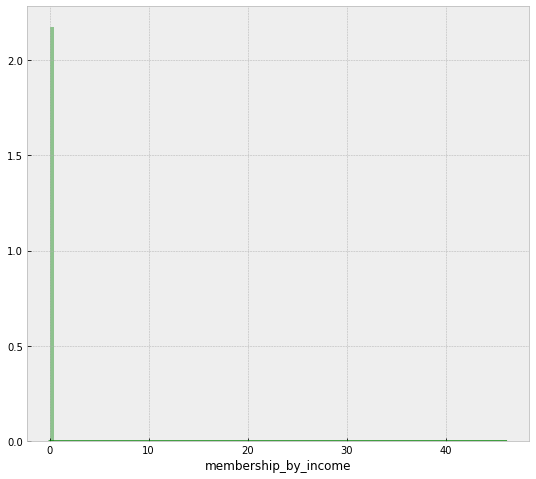

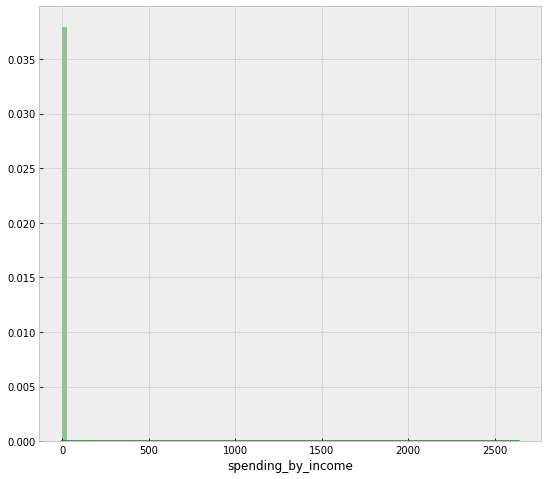

In [5]:
for i, col in enumerate(quantity_features+number_features+ratio_features):
    plt.figure(figsize=(9, 8))
    try: sns.distplot(train_data_df[col], color='g', bins=100, hist_kws={'alpha': 0.4});
    except: continue
    plt.savefig('graphs_EDA//'+str(i)+'.jpg', dpi = 100)
    print i
# With this information we can see that the col are skewed right or left and some outliers lies above some value. 
# We will eventually want to get rid of the them to get a normal distribution of the independent variable for
# machine learning.
# Note: Apparently using the log function could do the job

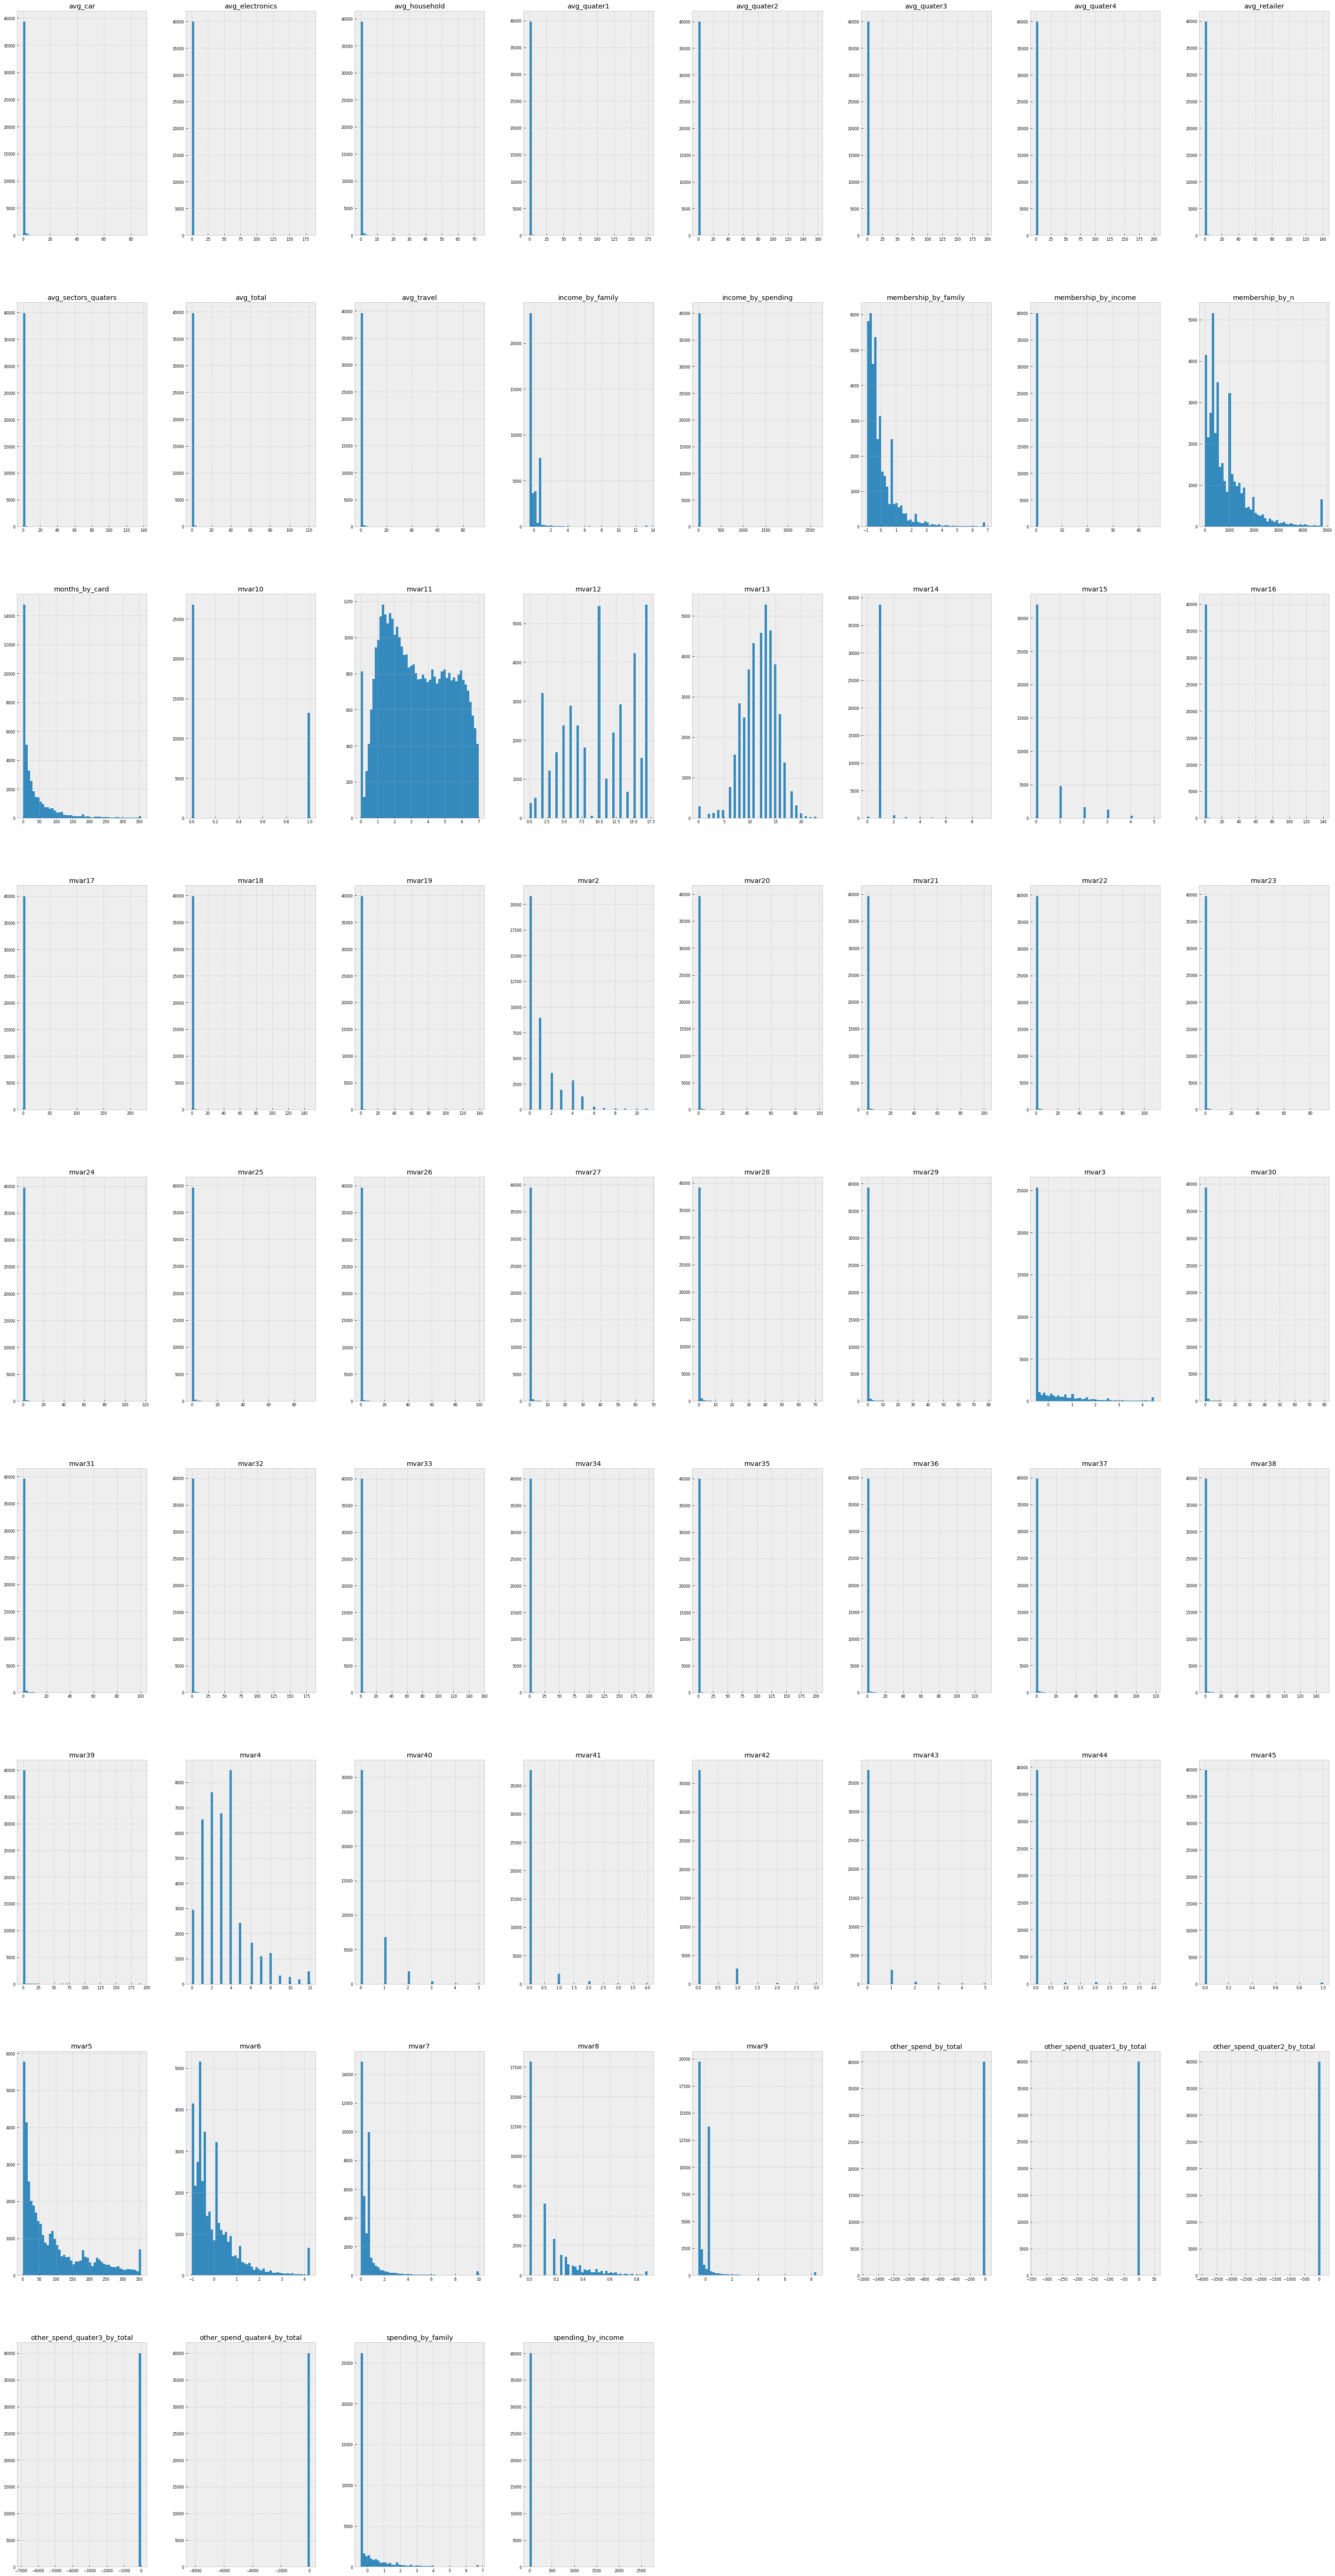

In [9]:
df_num = train_data_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
fig, ax = plt.subplots(figsize=(50,100))

df_num.hist(bins=50, xlabelsize=8, ylabelsize=8, ax=ax)
fig.savefig('graphs_EDA/histograms.png')
# ; avoid having the matplotlib verbose informations
# Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seems to share a similar distribution 
# to the one we have with `SalePrice`. Lets see if we can find new clues later.

In [ ]:
corr = df_num.corr() 
plt.figure(figsize=(16, 14))
cx = sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', 
            vmax=1.0, 
            vmin=-1.0, 
            linewidths=0.1,
            annot=True, 
            annot_kws={"size": 8}, 
            square=True)
fig = cx.get_figure()
fig.savefig('graphs_EDA/correlation.png')


CORRELATION -- Quantitative to Quantitative relationship

In [ ]:
# df_quantitative_values = train[number_features]
# fig, ax = plt.subplots(int(math.fabs(len(number_features)) / 3), 3, figsize = (18, 12))


# for i, ax in enumerate(fig.axes):
#     if i < len(number_features) - 1 and j < len(number_features) - 1:
#         sns.regplot(x=number_features[i],
#                     y=***************************, 
#                     data=train[number_features], 
#                     ax=ax)

CORRELATION -- Categorical to Quantitative relationship

In [ ]:
# fig, axes = plt.subplots(round(len(df_categ.columns) / 3), 3, figsize=(12, 30))
# for i, ax in enumerate(fig.axes):
#     if i < len(df_categ.columns):
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#         sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_not_num, ax=ax)
# fig.tight_layout()

References 
1. https://www.kaggle.com/hadend/tuning-random-forest-parameters
2. https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
3. http://hamelg.blogspot.in/2015/12/python-for-data-analysis-part-30-random.html
4. http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
5. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
6. 